In [33]:
"""
This file is used to generate linearly seperable data
- Author: Patel Jainil Subhashkumar (21114072)

- Take random line y = mx + c
- Generate random points and classify them as 1 or 0
"""

import csv
import random

# y = mx + c
m = int(input("Enter m: "))
c = int(input("Enter c: "))
n = int(input("Enter number of points: "))

# Generate 1000 points
X = []
Y = []
true_label = []

for i in range(n):
    x = random.uniform(-100, 100)
    y = random.uniform(-100, 100)
    X.append(x)
    Y.append(y)
    if y > m*x + c:
        true_label.append(1)
    elif  (y < m*x + c):
        true_label.append(-1)
    else:
        true_label.append(0)


# Write to csv file
with open('./linearSeperableData.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(n):
        writer.writerow([X[i], Y[i], true_label[i]])

print("Data generated and saved in linearSeperableData.csv")

Data generated and saved in linearSeperableData.csv


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [35]:
# Read the X from the csv file
dataFrame = pd.read_csv('./linearSeperableData.csv', header=None)
dataFrame.columns = ['x1', 'x2', 'y']
print(dataFrame.head())

# convert the dataFrame to numpy array
X = np.array(dataFrame[['x1', 'x2']])
ones_column = np.ones((X.shape[0], 1))
X_with_ones = np.hstack((X, ones_column))
X = X_with_ones
Y = np.array(dataFrame['y'])

          x1         x2  y
0 -35.708764  62.862134 -1
1 -81.064900  19.907270 -1
2 -47.946971 -13.682953 -1
3  64.510842 -28.313067  1
4 -42.129671   6.696229 -1


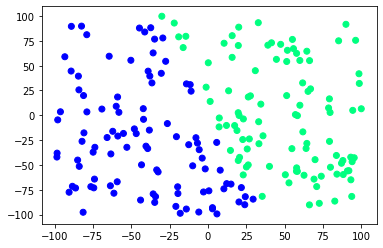

In [36]:
# ploting the X
plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.show()

In [37]:
# Pocket Algorithm

numFeatures = 2
weights = np.zeros(numFeatures+1)
ERROR = 10000000000000
learningRate = 0.2
print("Dimension of weights: ", weights.shape)
print("Dimension of X[0]: ", X.shape)
print("Dimension of Y[0]: ", Y.shape)
done = False
error = []

while not done:
    misclassified = 0
    tempWeights = weights
    for i in range(len(X)):
        predicted = np.sign(np.dot(X[i], tempWeights))

        if predicted != Y[i]:
            misclassified += 1
            tempWeights += learningRate * X[i] * (Y[i] - predicted)

    err = (misclassified / len(X)) * 100
    print("Misclassified: ", misclassified)
    if (misclassified == 0) or (err > ERROR):
        done = True
        break

    ERROR = err
    weights = tempWeights
    error.append(err)
print("Error: ", error)
print("Weights: ", weights)

Dimension of weights:  (3,)
Dimension of X[0]:  (200, 3)
Dimension of Y[0]:  (200,)
Misclassified:  13
Misclassified:  9
Misclassified:  6
Misclassified:  7
Error:  [6.5, 4.5, 3.0]
Weights:  [114.7179133   40.50650982  -4.2       ]


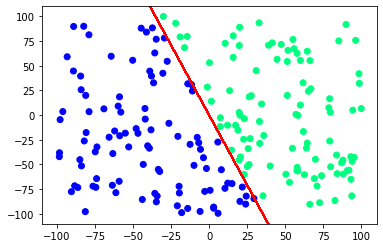

In [38]:
# plot data with linear seperator using weights
y_pred = []
for i in range(len(X)):
    y_pred.append(0 if np.sign(np.dot(X[i], weights)) == 1 else 1)

plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.plot(X[:,0], (-weights[0]/weights[1])*X[:,0], 'r-')
plt.xlim(-110, 110)
plt.ylim(-110, 110)
plt.show()

Error:  3.0


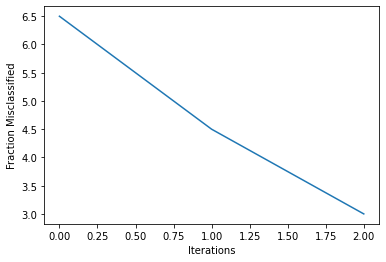

In [39]:
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Fraction Misclassified')
print("Error: ", error[-1])